<a href="https://colab.research.google.com/github/j-cunanan/MLT-contributions/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Support Vector Machines

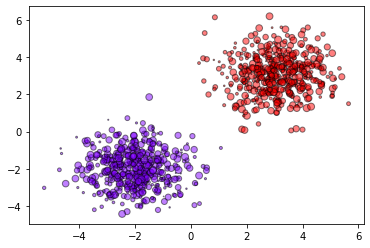

In [1]:
#@markdown Generate 2 blobs with 2 classes 
n_samples =  1000#@param {type:"integer"}
import tensorflow as tf
tf.random.set_seed(1)
from tensorflow.keras.layers.experimental import RandomFourierFeatures

import numpy as np
from numpy.random import seed
seed(10)
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import make_blobs
centers = [(-2, -2), (3, 3)]
X, y = make_blobs(n_samples=n_samples, centers=centers, shuffle=False,
                  random_state=42)

y[:n_samples // 2] = -1
y[n_samples // 2:] = 1
sample_weight = np.random.RandomState(42).rand(y.shape[0])

y_unique = np.unique(y)
colors = plt.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
for this_y, color in zip(y_unique, colors):
    this_X = X[y == this_y]
    this_sw = sample_weight[y == this_y]
    plt.scatter(this_X[:, 0], this_X[:, 1], s=this_sw * 50,
                c=color[np.newaxis, :],
                alpha=0.5, edgecolor='k',
                label="Class %s" % this_y)

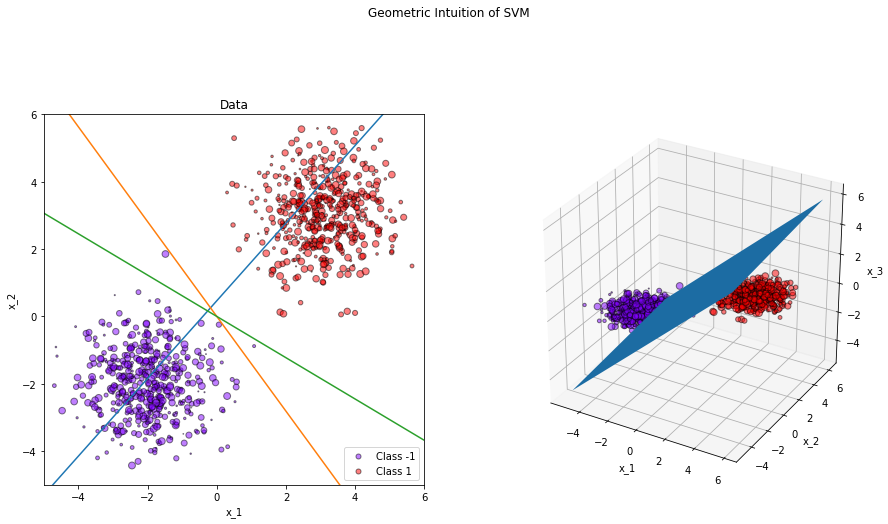

In [2]:
#@markdown ##Geometric Intuition of SVM
#@markdown ###The figure on the left shows lines which may or may not separate the two blobs. The figure on the right shows how a 2D plane can separate blobs in 3D space 
np.random.seed(7125) 
# Set up a figure 
fig = plt.figure(figsize=(15,15))
fig.suptitle('Geometric Intuition of SVM')

# First subplot
ax = fig.add_subplot(2, 2, 1)

for this_y, color in zip(y_unique, colors):
    this_X = X[y == this_y]
    this_sw = sample_weight[y == this_y]
    plt.scatter(this_X[:, 0], this_X[:, 1], s=this_sw * 50,
                c=color[np.newaxis, :],
                alpha=0.5, edgecolor='k',
                label="Class %s" % this_y)
xbar = np.linspace(-6,6)
wbar = np.random.normal()
b = np.random.normal()
ybar = np.dot(xbar,wbar) + b

#plot 3 lines
plt.plot(xbar, ybar)
plt.plot(xbar, np.dot(xbar,np.random.normal()))
plt.plot(xbar, np.dot(xbar,np.random.normal()))
plt.xlim(-5, 6), plt.ylim(-5, 6)

plt.legend(loc="best")
plt.title("Data")

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')

# #Second subplot
ax = fig.add_subplot(2,2,2, projection='3d')

for this_y, color in zip(y_unique, colors):
    this_X = X[y == this_y]
    this_sw = sample_weight[y == this_y]
    plt.scatter(this_X[:, 0], this_X[:, 1], s=this_sw * 50,
                c=color[np.newaxis, :],
                alpha=0.5, edgecolor='k',
                label="Class %s" % this_y)

point  = np.random.normal(size=3)
normal = np.random.normal(size=3)

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -point.dot(normal)

# create x,y
xx, yy = np.meshgrid([-5,6], [-5,6])

# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# plot the surface
# plt3d = plt.figure().gca(projection='3d')
ax.plot_surface(xx, yy, z)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('x_3')

plt.show()

In [3]:
# Load Data
iris = datasets.load_iris()
X = iris.data[:, :2][iris.target != 2] # (100, 2)
y = iris.target[iris.target != 2] # (100,)

# Change labels to +1 and -1 
y = np.where(y==1, y, -1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_fourier_features (Ran (None, 200)               601       
_________________________________________________________________
linear (Dense)               (None, 1)                 201       
Total params: 802
Trainable params: 201
Non-trainable params: 601
_________________________________________________________________


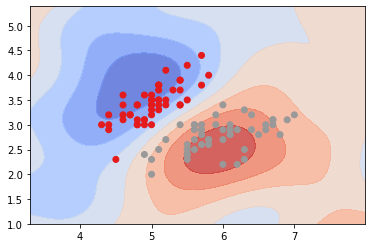

In [4]:
 #@markdown # keras model imitating SVM
epochs = 100 #@param {type: "integer"}
scale = 0.8 #@param {type:"slider", min:0.1, max:20, step:0.1}
RFF = True #@param {type: "boolean"}
kernel_initializer = "gaussian" #@param ["gaussian", "laplacian"]
# Linear Model 
model = tf.keras.Sequential()

if RFF:
  model.add(RandomFourierFeatures(
            output_dim=200, scale=scale, kernel_initializer=kernel_initializer,
        ))
# model.add(tf.keras.layers.Dropout(.15))
model.add(tf.keras.layers.Dense(1, name='linear',kernel_regularizer=tf.keras.regularizers.l2()))
# Hinge loss
def hinge_loss(y_true, y_pred):    
    return tf.maximum(0., 1- y_true*y_pred)

# Train the model
model.compile(optimizer='adam', loss=hinge_loss)
model.fit(X, y.astype('float64'), epochs=epochs, verbose=False)
model.summary()
# Plot the learned decision boundary 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.show()

del model

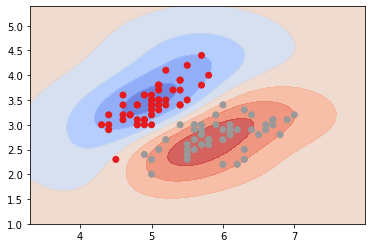

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#@markdown ##scikit-learn SVM classifier
kernel = 'rbf' #@param ["rbf", "linear", "poly", "sigmoid"]
prediction_mode = False #@param {type: "boolean" }

clf = make_pipeline(StandardScaler(), SVC(kernel=kernel, gamma='auto'))
clf.fit(X, y)

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) # use method 'decision function' to have countour
if prediction_mode:
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.show()

In [6]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [7]:
!curl -L "https://docs.google.com/uc?export=download&id=1L780-P2IV94K4wJEIBu-9jyp4NmvjMIC" > spam.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0   1247      0 --:--:-- --:--:-- --:--:--  1247
100  491k  100  491k    0     0   836k      0 --:--:-- --:--:-- --:--:-- 7807k


In [8]:
data = pd.read_csv("spam.csv",encoding='latin-1')
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"class", "v2":"text"})
data.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data['length'] = data['text'].apply(len)
data.head()

,class,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


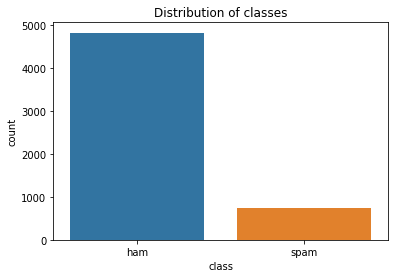

In [10]:
import seaborn as sns
# Plotting the distribution of Scores
plt.figure()
sns.countplot(data['class'])
plt.title('Distribution of classes')
plt.show()

In [11]:
textFeatures = data['text'].copy()
vectorizer = TfidfVectorizer("english")
features = vectorizer.fit_transform(textFeatures)

features_train, features_test, labels_train, labels_test = train_test_split(features, data['class'], test_size=0.3, random_state=111)

In [12]:
from sklearn.metrics import recall_score
from sklearn.svm import SVC

svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(features_train, labels_train)
prediction = svc.predict(features_test)
recall_score(labels_test,prediction, labels=['ham', 'spam'], pos_label='spam')

0.9008620689655172

In [13]:
sample = vectorizer.transform(['hey bro', 'YOu mail me money please', 'you won lottery!', 'Please advice', 'cash prize', 'request for editorial review'])
svc.predict(sample)

array(['ham', 'ham', 'spam', 'ham', 'spam', 'ham'], dtype=object)